# Audience

This talk is for you:

- if you have some knowledge of word2vec and / or embeddings
- you've always wondered why neural networks perform so well (what is their _"secret sauce"_)

# A recap on neural networks

Neural networks are useful as universal function approximators. They can solve non-trivial (non-linear) problems, that simple models cannot solve.

# Neural networks are state of the art (SotA)

![Language Modelling on Penn Treebank (Word Level)](./chart.png)

# No free lunch

> In a noise-free scenario where the loss function is the misclassification rate, if one is interested in off-training-set error, then there are no a priori distinctions between learning algorithms [@10.1162/neco.1996.8.7.1341]

# When GZIP beats neural networks

This year [@jiang2023low] published a paper in which simple models based on compression algorithms were able to outcompete SotA models. The model builds on the intuition that compressors will remove redundant information between two sentences.

# Compression based classifiers

The parameter-free model introduced by [@jiang2023low] calculates the normalised compressed distance (NCD), and can be used as follows:

1. Let $C$ be the compressor (e.g GZIP)
2. Calculate the compressed text length for $x_1, x_2$
3. $NCD(x, y) = \frac{C(xy)−\min{C(x),C(y)}}{\max{C(x), C(y)}}$
4. Feed the NCD into your favourite classifier, such as KNN

# Evaluation

/var/folders/k6/hdzmrkf915d0twbr_qmhy9l00000gn/T/ipykernel_6120/1607749823.py:12: UserWarning: The palette list has more values (20) than needed (14), which may not be intended.
  sns.barplot(df_jiang2023low, x="dataset", y="value", hue="Model", ax=ax, palette=sns.color_palette("tab20"))


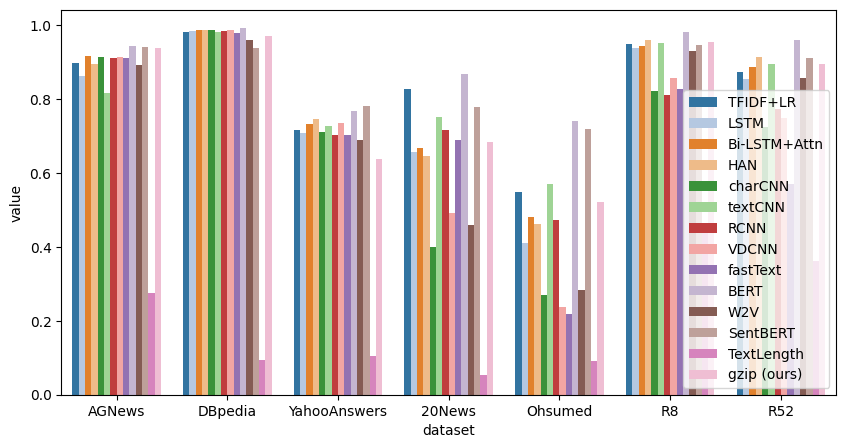

In [1]:
#| label: fig-jiang2023low-results
#| fig-cap: "Accuracy of different models on news classification tasks"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_jiang2023low = pd.read_csv("tabula-2023.findings-acl.426.csv")
df_jiang2023low = pd.melt(df_jiang2023low, id_vars=["Model"], var_name="dataset", value_vars=["AGNews", "DBpedia", "YahooAnswers", "20News", "Ohsumed", "R8", "R52"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df_jiang2023low, x="dataset", y="value", hue="Model", ax=ax, palette=sns.color_palette("tab20"))
plt.legend(loc='lower right')
plt.show()

# Rigid benchmarks

It is important to note that [@jiang2023low] evaluate on a narrow task set. Their method is used exclusively for classification, whereas other models are applied to a broad range of tasks (clustering, retrieval, semantic similarity etc). While they achieve a new (or comparable) SoTa, the comparison is not entirely fair. Further their evaluations are mono-lingual!

# A look into word2vec

[@levy-etal-2015-improving] took a look into the _companion_ code of word2vec and GloVe, and found that there was no distinct advantage in using neural networks.

# Algorithms examined

- Positive pointwise mutual information (PPMI)
- Singular value decomposition (SVD)
- Skip-grams with negative sampling (SGNS)
- Global Vectors (GloVe)

# Transferable hyperparameters

[@levy-etal-2015-improving] introduce several distinct hyperparameters that are used by word2vec and GloVe to enable (or improve) the training objective. They split these hyperparameters into three groups:

- pre-processing hyperparameters
- associative metric hyperparameters
- post-processing hyperparameters

# Pre-processing hyperparameters

## dynamic context windows (dyn)

In traditional BOW windows (PMI), all words are weighted equally. In word2vec and GloVe, only words that are withing a given window (e.g 5 tokens) will be considered. In word2vec the weight per token is given by uniformly sampling the actual window size between 1 and L, for each token [@mikolov2013efficient].

## subsampling (sub)

Subsampling is a method of diluting very frequent words, akin to removing stop-words. The subsampling method presented in [@mikolov2013efficient] randomly removes words that are more frequent than some threshold t with a probability of p, where f marks the word’s corpus frequency:

$p=1 - \sqrt{\frac{t}{f}}$


# Pre-processing hyperparameters
## deleting rare words (del)

word2vec removes tokens that are rare in the training corpus from the corpus before creating context windows.

# Association Metric hyperparameters

## Shifted PMI (neg)

SGNS has a hyperparameter k (the number of negative samples), which affects the value that SGNS is trying to optimize  $\forall w, c$. This hyperparameter changes the underlying distribution of the model by making different tokens more (or less) probable.

## Context distribution smoothing (cds)

In word2vec, negative examples (contexts) are sampled according to a smoothed unigram distribution. Similarly to shifted PMI, this helps alleviating bias against rare words.

# Post-processing hyperparameters

## Adding context vectors (w+c)

[@pennington-etal-2014-glove] propose using the context vectors in addition to the word vectors as GloVe’s output. For example, the word “cat” can be represented as:

$\vec{V_{cat}}=\vec{w_{cat}}+\vec{c_{cat}}$ 

where $\vec{w_{cat}}$ and $\vec{c_{cat}}$ are the word and context embeddings, respectively.
The aim of this method is to move together words that are semantically similar (share the same context).

## Eigenvalue Weighting (eig)

The decomposition of the eigenvalue (for SVD) doesn't need to decompose uniformly. The factorisation can be a tuneable hyperparameter.

# Evaluation

We introduced seven hyperparameters which are implicitly (or explicitly) tuned for in word2vec and GloVe. In their evaluation [@levy-etal-2015-improving] systematically applied these hyperparameters using hyperparameter tuning for the different available algorithms.

# Results

/var/folders/k6/hdzmrkf915d0twbr_qmhy9l00000gn/T/ipykernel_6120/1794048261.py:8: UserWarning: The palette list has more values (20) than needed (6), which may not be intended.
  sns.barplot(df_levy, x="dataset", y="value", hue="Method", ax=ax, palette=sns.color_palette("tab20"))


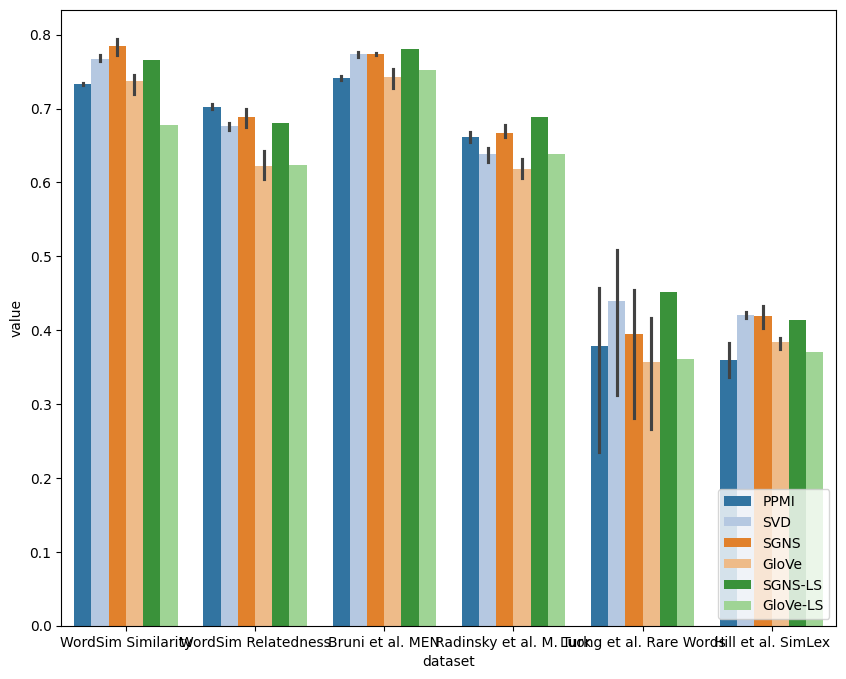

In [2]:
#| label: fig-levy-etal-2015-improving
#| fig-cap: "Performance of each method across different tasks using 2-fold cross-validation for hyperparameter tuning"

df_levy = pd.read_csv("tabula-Q15-1016.csv")
df_levy = pd.melt(df_levy, id_vars=["Method"], var_name="dataset", value_vars=["WordSim Similarity", "WordSim Relatedness", "Bruni et al. MEN", "Radinsky et al. M. Turk", "Luong et al. Rare Words", "Hill et al. SimLex"])

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(df_levy, x="dataset", y="value", hue="Method", ax=ax, palette=sns.color_palette("tab20"))
plt.legend(loc='lower right')
plt.show()


# Conclusions

- there is no one preferable method to produce word embeddings (there is no free lunch!)
- we don't know what exactly neural networks contribute to this task
- evaluations need to be rigid and contain hyperparameters

# Closing remarks

To train word2vec **five** hyperparameters were introduced which were not considered part of the evaluation. In a **lot** of machine learning publications, tuneable hyperparameters are simply _given_ as part of the training objective! We need to have solid baselines to see what neural networks actually achieve.

# References